#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score

In [2]:
x_points = np.linspace(0,20,50)
y_points = -1 * x_points + 2* np.ones(len(x_points))
learning_rate = 0.0001

#### Plot your data points. 

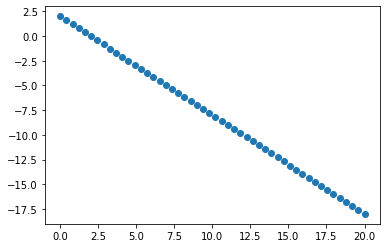

In [3]:
plt.scatter(x_points,y_points)
plt.show()

#### Calculating r2 score.
#### Plotting some curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [4]:
def batch_GD(x_data, y_data, lRate, max_iter):
    th0=0
    th1=0
    thetas0 = []
    thetas1 = []
    losses = []
    hypothesis = []
    epochs=0
    for i in range (max_iter):
        h = th0 + th1 * x_data
        gradientTh0 = (lRate/len(x_data))*sum(h- y_data)
        gradientTh1 = (lRate/len(x_data))*sum((h- y_data) * x_data)
        th0 = th0 - gradientTh0
        th1 = th1 - gradientTh1
        thetas0.append(th0)
        thetas1.append(th1)
        losses.append((1/2*len(x_data))*sum(h-y_data)**2)
        hypothesis.append(h)
        epochs+=1
        if math.sqrt(gradientTh0 ** 2 + gradientTh1 ** 2) < 0.001:
            break
    return thetas0,thetas1,losses,hypothesis,th0,th1,epochs

In [5]:
batch = batch_GD(x_points,y_points,learning_rate,1000)
y_pred= batch[4] + batch[5]*x_points
print(r2_score(y_points,y_pred))


0.9484946348276313


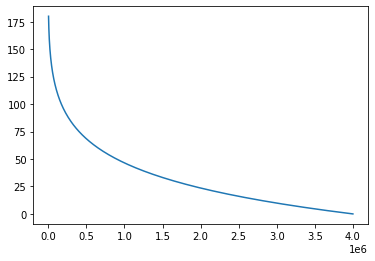

In [6]:
plt.plot(batch[2],list(range(batch[6])))
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

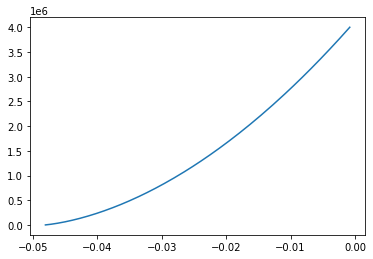

In [7]:
plt.plot(batch[0],batch[2])
plt.show()

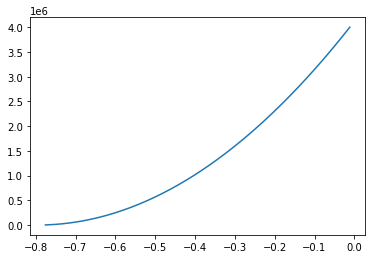

In [8]:
plt.plot(batch[1],batch[2])
plt.show()

### Updating Batch GD for one variable implementation to be Momentum-Based GD

In [9]:
def momentum_batch_GD(x_data, y_data, lRate, gamma, max_iter):
    th0=0
    th1=0
    vt0=0
    vt1=0
    thetas0 = []
    thetas1 = []
    losses = []
    hypothesis = []
    for i in range (max_iter):
        h = th0 + th1 * x_data
        gradientTh0 = (lRate/len(x_data))*sum(h- y_data)
        gradientTh1 = (lRate/len(x_data))*sum((h- y_data) * x_data)
        vt0 = gamma*vt0 + gradientTh0
        vt1 = gamma*vt1 + gradientTh1
        th0 = th0 - vt0
        th1 = th1 - vt1
        thetas0.append(th0)
        thetas1.append(th1)
        losses.append((1/2*len(x_data))*sum(h-y_data)**2)
        hypothesis.append(h)
        if math.sqrt(gradientTh0 ** 2 + gradientTh1 ** 2) < 0.001:
            break
    return thetas0,thetas1,losses,hypothesis,th0,th1


In [10]:
momentum = momentum_batch_GD(x_points,y_points,0.0001,0.5,1000)
y_pred= momentum[4] + momentum[5]*x_points
print(r2_score(y_points,y_pred))

0.9492099179448203


In [11]:
momentum = momentum_batch_GD(x_points,y_points,0.0001,0,1000)
y_pred= momentum[4] + momentum[5]*x_points
print(r2_score(y_points,y_pred))

0.9484946348276313


In [12]:
momentum = momentum_batch_GD(x_points,y_points,0.0001,0.1,1000)
y_pred= momentum[4] + momentum[5]*x_points
print(r2_score(y_points,y_pred))

0.9481143686376127


In [13]:
momentum = momentum_batch_GD(x_points,y_points,0.0001,0.9,1000)
y_pred= momentum[4] + momentum[5]*x_points
print(r2_score(y_points,y_pred))

0.9676978464140505


### Updating Batch GD for one variable implementation to be NAG

In [14]:
def NAG_batch_GD(x_data, y_data, lRate, gamma, max_iter):
    th0=0
    th1=0
    vt0=0
    vt1=0
    thetas0 = []
    thetas1 = []
    losses = []
    hypothesis = []
    for i in range (max_iter):
        th0temp = th0 - gamma * vt0
        th1temp = th1 - gamma * vt1
        h = th0temp + th1temp * x_data
        gradientTh0 = (lRate/len(x_data))*sum(h- y_data)
        gradientTh1 = (lRate/len(x_data))*sum((h- y_data) * x_data)
        vt0 = gamma*vt0 + gradientTh0
        vt1 = gamma*vt1 + gradientTh1
        th0 = th0temp - gradientTh0
        th1 = th1temp - gradientTh1
        thetas0.append(th0)
        thetas1.append(th1)
        losses.append((1/2*len(x_data))*sum(h-y_data)**2)
        hypothesis.append(h)
        if math.sqrt(gradientTh0 ** 2 + gradientTh1 ** 2) < 0.001:
            break
    return thetas0,thetas1,losses,hypothesis,th0,th1

In [18]:
nag = NAG_batch_GD(x_points,y_points,0.0001,0.5,1000)
y_pred= nag[4] + nag[5]*x_points
print(r2_score(y_points,y_pred))

0.9489001395050869
